<a href="https://colab.research.google.com/github/ShivamAryaJha/Document-Scanner-with-OCR-For-Handwritten-text/blob/master/TextOCRwithMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# This notebook features MNIST Dataset Classification using basic MLP

In [ ]:
print(tf.__version__)


2.3.0


In [ ]:
 mdf = tf.keras.datasets.mnist
print(mdf)

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>


In [ ]:
(trainx, trainy), (testx, testy) = mdf.load_data()
trainx, testx = trainx/255, testx/255

In [ ]:
trainx = trainx.reshape((60000, 28, 28, 1))
testx = testx.reshape((10000, 28, 28, 1))
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)
print(type(testx))

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
<class 'numpy.ndarray'>


9
(1, 28, 28, 1)


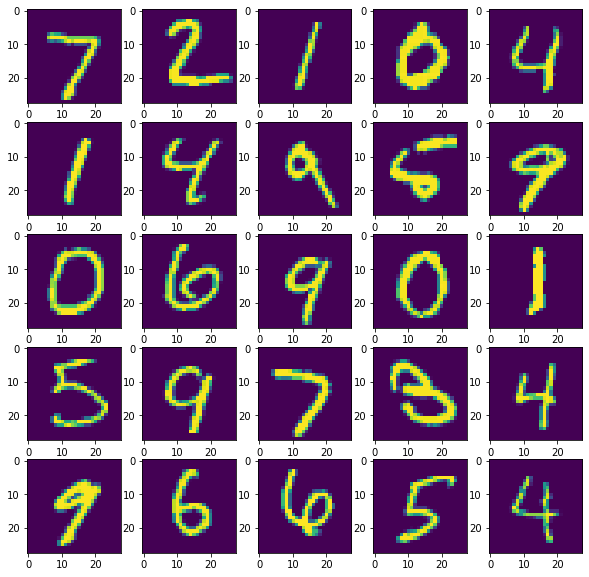

In [ ]:
print(testy[9])
print(testx[1:2].shape)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(testx[i].reshape((28, 28)))
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
preds = model(trainx[:1]).numpy()
print(preds)

[[3.3108878e-14 1.3401144e-15 1.0425344e-11 1.8484883e-02 1.3337691e-24
  9.8151511e-01 1.9461876e-19 1.9506594e-14 1.8003438e-16 1.2587445e-13]]


In [ ]:
 model.fit(trainx, trainy, epochs=10, batch_size=32, validation_data=(testx, testy), verbose=0)

In [ ]:
model.evaluate(testx, testy, verbose =1)

313/313 [==============================] - 0s 1ms/step - loss: 1.4826 - accuracy: 0.9794


[1.482572078704834, 0.9793999791145325]

In [ ]:
options = model.predict(testx[50:75])
#print(options)
#print(np.argmax(options))

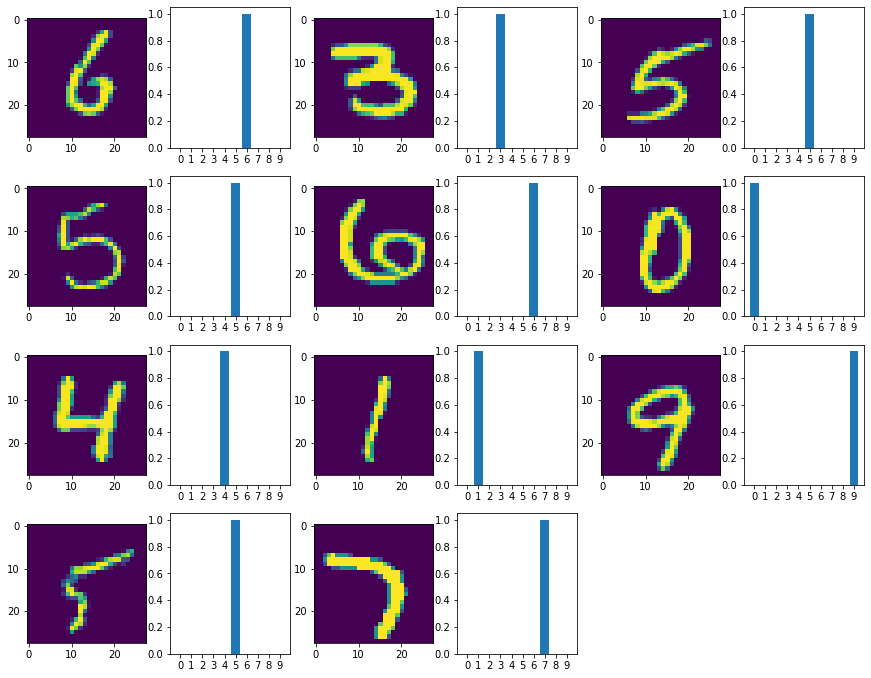

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(11):
  plt.subplot(5, 6, 2*i+2)
  x = range(10)
  plt.bar(x, options[i])
  plt.xticks(np.arange(0, 10, step = 1))
  plt.subplot(5, 6, 2*i+1)
  plt.imshow(testx[50+i].reshape((28,28)))


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

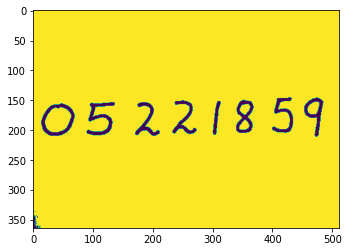

In [ ]:
image = cv2.imread("/content/img2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
T = 100
image = (image > T).astype("uint8") * 255

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw_im = np.copy(image)

req = []
c = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if(h >10 and w >10):
        im =  draw_im[y-6:y+h+6, x-6:x+w+6]
        kernel = np.ones((2,2),np.float32)/25
        #im = cv2.filter2D(im,-1,kernel)
        #cv2.rectangle(draw_im, (x-5, y-5), (x+w+4, y+h+4), (0,0,255), 2)
        rsz = cv2.resize(im, (28, 28))
        req.append(rsz)
        c = c+1
plt.imshow(draw_im)
plt.show()

In [ ]:
new = np.asarray(req)
new = new.reshape(8, 28, 28, 1)
opt = model.predict(new)
print(opt)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


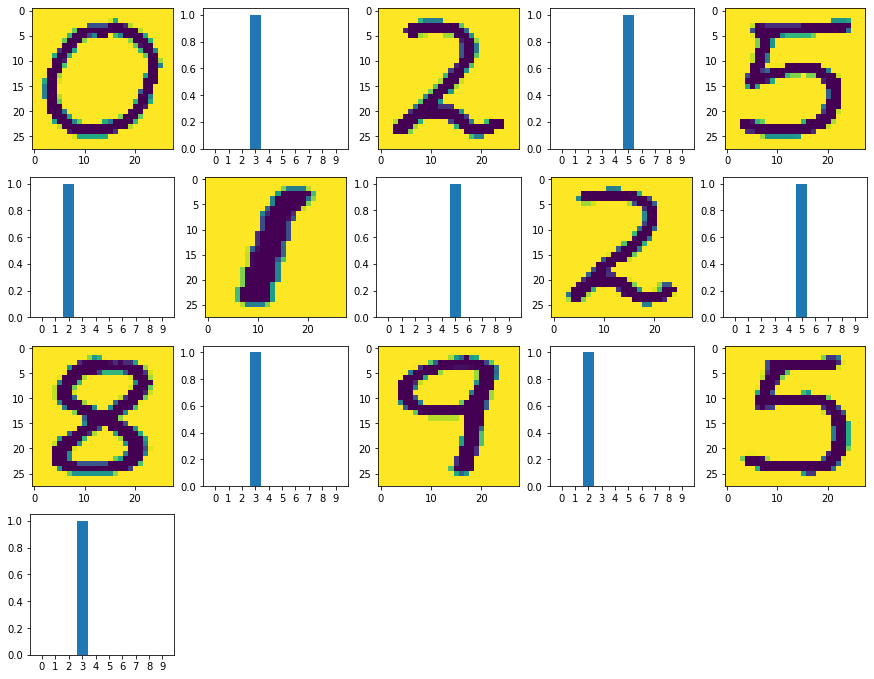

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(8):
  plt.subplot(5, 5, 2*i+2)
  x = range(10)
  plt.bar(x, opt[i])
  plt.xticks(np.arange(0, 10, step = 1))
  plt.subplot(5, 5, 2*i+1)
  plt.imshow(new[i].reshape(28, 28))